In [1]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\java"

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pyth

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 57 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existen

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
from konlpy.tag import Okt
from konlpy.tag import Kkma
from collections import Counter
import datetime
import nltk

In [4]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
plt.rc('font', family='NanumBarunGothic') # 한글폰트 적용

In [6]:
issue = '/content/drive/My Drive/bc카드/이슈지표.csv'

In [7]:
okt=Okt()

In [8]:
issue_data = pd.read_csv(issue, encoding="euc-kr")
issue_data.head()
len(issue_data)

60612

In [9]:
# 이슈내용 단어만 분리

In [10]:
issue_data['이슈내용'] = issue_data['이슈내용'].str.replace('wordweights(.*).','',regex=True)

In [11]:
issue_data['이슈내용']= issue_data['이슈내용'].str.replace("{'words':",'')

In [12]:
issue_data

,기준일자,주식종목값,주식종목명,이슈내용,이슈분류이용문서수,우편번호,적재일시,센터코드
0,20190424,51630,진양화학,"[ ['화학', '선', '차트', '진양', '상승', '주가', '경제', '단...",5,44781.0,2.020000e+13,BBP14
1,20190423,82920,비츠로셀,"[ ['계약', '경제', '비츠', '규모', '전지', '언론사', '해당', ...",5,31816.0,2.020000e+13,BBP14
2,20190417,23890,한국아트라스비엑스,"[ ['라스', '아트', 'BX', '주주', '밸류', '너스', '파트', '...",5,34365.0,2.020000e+13,BBP14
3,20190419,97800,윈팩,"[ ['경제', '서울', '윈', '팩', '헤럴드', '언론사', '투자', '...",5,17172.0,2.020000e+13,BBP14
4,20190417,4960,한신공영,"[ ['한신공영', '봉사', '기자', '라오스', '가구', '있', '언론사'...",5,17172.0,2.020000e+13,BBP14
...,...,...,...,...,...,...,...,...
60607,20190424,1740,SK네트웍스,"[ ['SK', '분기', '네트', '웍스', '렌터카', '금융', '영업', ...",7,4534.0,2.020000e+13,BBP14
60608,20190424,263050,유틸렉스,"[ ['틸', '렉스', '유', '임상', '시험', '중지', '언론사', '처...",6,8594.0,2.020000e+13,BBP14
60609,20190424,39740,한국정보공학,"[ ['경제', '공시', '언론사', '주가', '한국정보공학', '급등', '관...",5,13590.0,2.020000e+13,BBP14
60610,20190424,10130,고려아연,"[ ['아연', '상승', '가격', '고려', '외국인', 'TC', '만주', ...",11,6110.0,2.020000e+13,BBP14


In [13]:
# 2019년과 2020년 데이터 프레임을 분리해주기

In [14]:
# datetime형으로 변환
issue_data['기준일자'] = issue_data['기준일자'].apply(lambda x:  pd.to_datetime(str(x)))

In [15]:
years = issue_data['기준일자'].dt.year.unique()

In [16]:
each_years = {y: issue_data[issue_data['기준일자'].dt.year == y] for y in years}

In [17]:
issue_2019 = each_years.get(2019)
len(issue_2019)

33591

In [18]:
issue_2020 = each_years.get(2020)
len(issue_2020)

27021

In [19]:
len(issue_2019) + len(issue_2020)

60612

In [20]:
#형태소 분석 (불용어 제거)

In [21]:
def clean_issue(issue):
  words = ''
  for line in issue:
    words = words +line
    words = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','',words) 
  return words

In [22]:
def morph(input_issue) : 
  issue_morphs = okt.morphs(input_issue) 
  stopwords = ['있','지','윈','팩','선','상','유','효','데','부','텍','익','임','로','형', '브','자', '보', '제','콘','티', '엠','계', '알','이','위','쿼','액','전','년','순','량']
  i_list=[word for word in issue_morphs if not word in stopwords]
  count = Counter(i_list)
  count.most_common()
  return count.most_common()

In [23]:
clean_issues = clean_issue(issue_2019['이슈내용'])

In [24]:
clean_issues

' 화학 선 차트 진양 상승 주가 경제 단기 중기 한국  계약 경제 비츠 규모 전지 언론사 해당 미터 뉴스 리튬  라스 아트  주주 밸류 너스 파트 있 최근 한국  경제 서울 윈 팩 헤럴드 언론사 투자 시설 뉴스 구독  한신공영 봉사 기자 라오스 가구 있 언론사 활동 효 한경  외국인 기관 매수 최근  뉴스  있 선 언론사   대표 고객 경제 있 쇼핑 언론사 디지털 김철수 성장  데일리 부 시장 언론사 사진 증권 있 정보 신청 주요  버킷 스튜디오 외국인 상승 한국 뉴스 주가 차트 언론사 매수  언론사 텍 뉴스 코스 케이 엔피 기자 경제 주식 무단  자율 주행 센서 시스템 영상 적외선 아이 투자 수혜 차   신원 지크 브랜드 경제 이벤트 언론사 제품 지 한국  한솔케미칼 분기 실적 영업 이익 예상 소재 주가 증가 증권  탑스 스타트업 지원 프로그램 경제 온라인 있 페이퍼 포럼 뉴스  경제 서울 윈 팩 언론사 헤럴드 시설 투자 네이버 구독  계약 경제 선 시스템 익 언론사 공시 디스플레이 규모 뉴스  배터리 이랜텍 스마트폰 투자 주요 금융 예상 확대 전망 언론사  건설 서희 조합 주택 물량 지역 언론사 경제 채무 보증    매수 외국인 경제 언론사 한국 상승 뉴스 전일  투자 공장 경제 뉴스 바이오 종근당 언론사 오송 해당 신설  팜 네오 주주 분기 성장 입점 확대 매출액 언론사 브랜드   경제 처분 디스커버리 공시 언론사 규모 뉴스 토지 이동  임상 백신 바이오 유 로직스 상 접합 있 수출 보  모바일 언스 플라이 상승 선 경제 차트 배 주가 한국  시멘트 기관 매수 경제 언론사 뉴스 외국인 순매도 있 한국  장대원 제약 대원 받 미국 제품 유산균 있 유기농 식품  형지 엘리트 교복 중국 송도 한국 패션 뉴스 시장 품질  로봇 유진 청소 아이 클 레보 있 뉴스 언론사 메이트  토니 모리 크림 키노 쇼핑 모스 있 홈 방송 쿠션  데일리 부 시장 언론사 사진 증권 있 정보 신청 주요  반도체 어보브 외국인 매수 보 한국 경제 뉴스 전일 선  알톤스포츠 자전거 전기

In [25]:
morph_issues19= morph(clean_issues)

In [26]:
morph_issues19

[('경제', 16560),
 ('언론사', 14571),
 ('뉴스', 11989),
 ('한국', 7104),
 ('분기', 5612),
 ('영업', 4863),
 ('외국인', 4427),
 ('매수', 4375),
 ('이익', 4316),
 ('기관', 3966),
 ('매출', 3652),
 ('증가', 3365),
 ('실적', 3108),
 ('서울', 2894),
 ('기자', 2747),
 ('투자', 2637),
 ('대비', 2619),
 ('거래', 2462),
 ('사업', 2232),
 ('계약', 1983),
 ('한경', 1976),
 ('최근', 1898),
 ('주가', 1826),
 ('상승', 1667),
 ('시장', 1572),
 ('기업', 1456),
 ('차트', 1409),
 ('제품', 1386),
 ('개발', 1349),
 ('규모', 1342),
 ('배', 1314),
 ('공시', 1237),
 ('일리', 1200),
 ('현대', 1189),
 ('매도', 1183),
 ('대표', 1092),
 ('기술', 1068),
 ('점수', 1058),
 ('바이오', 1027),
 ('증권', 1005),
 ('만주', 999),
 ('중국', 974),
 ('에스', 948),
 ('구독', 887),
 ('그룹', 849),
 ('아시아', 838),
 ('금융', 818),
 ('헤럴드', 812),
 ('성장', 784),
 ('서비스', 781),
 ('이사', 741),
 ('공급', 734),
 ('삼성', 710),
 ('올해', 689),
 ('브랜드', 681),
 ('게임', 670),
 ('해당', 668),
 ('산업', 652),
 ('회장', 647),
 ('앤', 618),
 ('출시', 592),
 ('수주', 592),
 ('건설', 586),
 ('테크', 582),
 ('생산', 575),
 ('장비', 574),
 ('아이', 566),
 ('제약', 544),


In [27]:
# 19년도 가장 많이나온 단어 50개

In [28]:
plt.rc('font', family='NanumBarunGothic') 

In [29]:
morph_issues19df = pd.DataFrame(morph_issues19)

In [30]:
morph_issues19df.columns = ["형태소", "빈도수"]

In [31]:
issues19_50=morph_issues19df.iloc[:50]

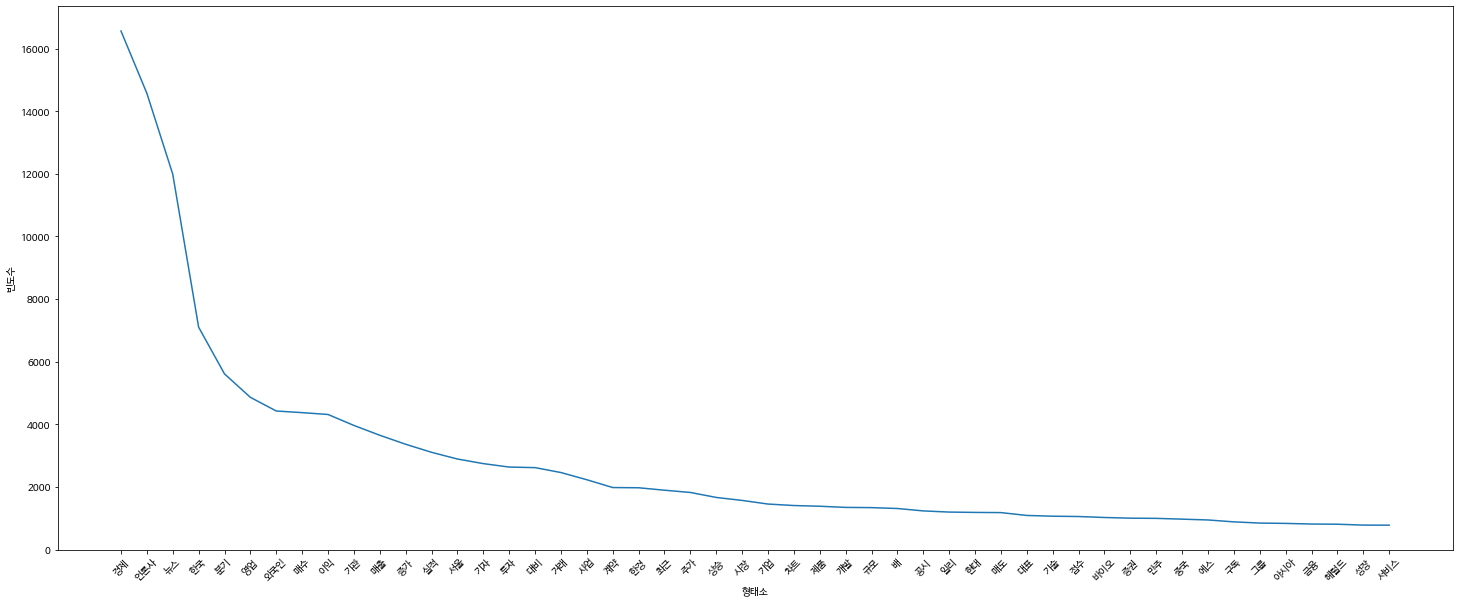

In [32]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 45 )
sns.lineplot(x=issues19_50.형태소, y=issues19_50.빈도수)

In [33]:
issue_2019

,기준일자,주식종목값,주식종목명,이슈내용,이슈분류이용문서수,우편번호,적재일시,센터코드
0,2019-04-24,51630,진양화학,"[ ['화학', '선', '차트', '진양', '상승', '주가', '경제', '단...",5,44781.0,2.020000e+13,BBP14
1,2019-04-23,82920,비츠로셀,"[ ['계약', '경제', '비츠', '규모', '전지', '언론사', '해당', ...",5,31816.0,2.020000e+13,BBP14
2,2019-04-17,23890,한국아트라스비엑스,"[ ['라스', '아트', 'BX', '주주', '밸류', '너스', '파트', '...",5,34365.0,2.020000e+13,BBP14
3,2019-04-19,97800,윈팩,"[ ['경제', '서울', '윈', '팩', '헤럴드', '언론사', '투자', '...",5,17172.0,2.020000e+13,BBP14
4,2019-04-17,4960,한신공영,"[ ['한신공영', '봉사', '기자', '라오스', '가구', '있', '언론사'...",5,17172.0,2.020000e+13,BBP14
...,...,...,...,...,...,...,...,...
60607,2019-04-24,1740,SK네트웍스,"[ ['SK', '분기', '네트', '웍스', '렌터카', '금융', '영업', ...",7,4534.0,2.020000e+13,BBP14
60608,2019-04-24,263050,유틸렉스,"[ ['틸', '렉스', '유', '임상', '시험', '중지', '언론사', '처...",6,8594.0,2.020000e+13,BBP14
60609,2019-04-24,39740,한국정보공학,"[ ['경제', '공시', '언론사', '주가', '한국정보공학', '급등', '관...",5,13590.0,2.020000e+13,BBP14
60610,2019-04-24,10130,고려아연,"[ ['아연', '상승', '가격', '고려', '외국인', 'TC', '만주', ...",11,6110.0,2.020000e+13,BBP14


In [34]:
issue_2019.groupby('주식종목명').이슈분류이용문서수.sum()

주식종목명
AJ네트웍스     309
AP시스템      109
BGF        178
BGF리테일     636
BNK금융지주     15
          ... 
흥국에프엔비      90
흥국화재        18
흥아해운       707
희림          77
힘스         228
Name: 이슈분류이용문서수, Length: 1288, dtype: int64

In [35]:
counter1 = issue_2019[issue_2019["기준일자"].between('2019-04-01 00:00:00','2019-04-30 23:00:00')]

In [36]:
clean_issues4 = clean_issue(counter1['이슈내용'])
morph_issues4= morph(clean_issues4)

In [37]:
morph_issues4df = pd.DataFrame(morph_issues4)

In [38]:
morph_issues4df.columns = ["형태소", "빈도수"]

In [39]:
issues1904_50=morph_issues4df.iloc[:50]

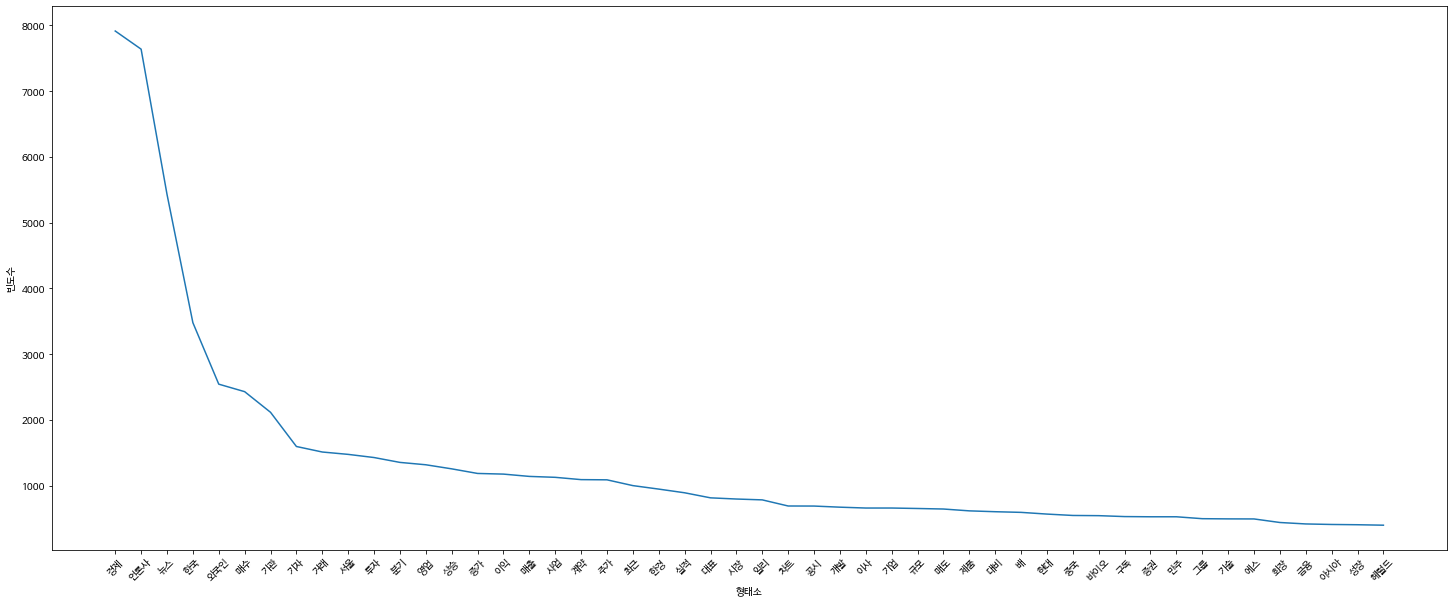

In [40]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 45 )
sns.lineplot(x=issues1904_50.형태소, y=issues1904_50.빈도수)

In [41]:
counter2 = issue_2019[issue_2019["기준일자"].between('2019-05-01 00:00:00','2019-05-31 23:00:00')]

In [42]:
clean_issues5 = clean_issue(counter2['이슈내용'])
morph_issues5= morph(clean_issues5)

In [43]:
morph_issues5df = pd.DataFrame(morph_issues5)

In [44]:
morph_issues5df.columns = ["형태소", "빈도수"]

In [45]:
issues1905_50=morph_issues5df.iloc[:50]

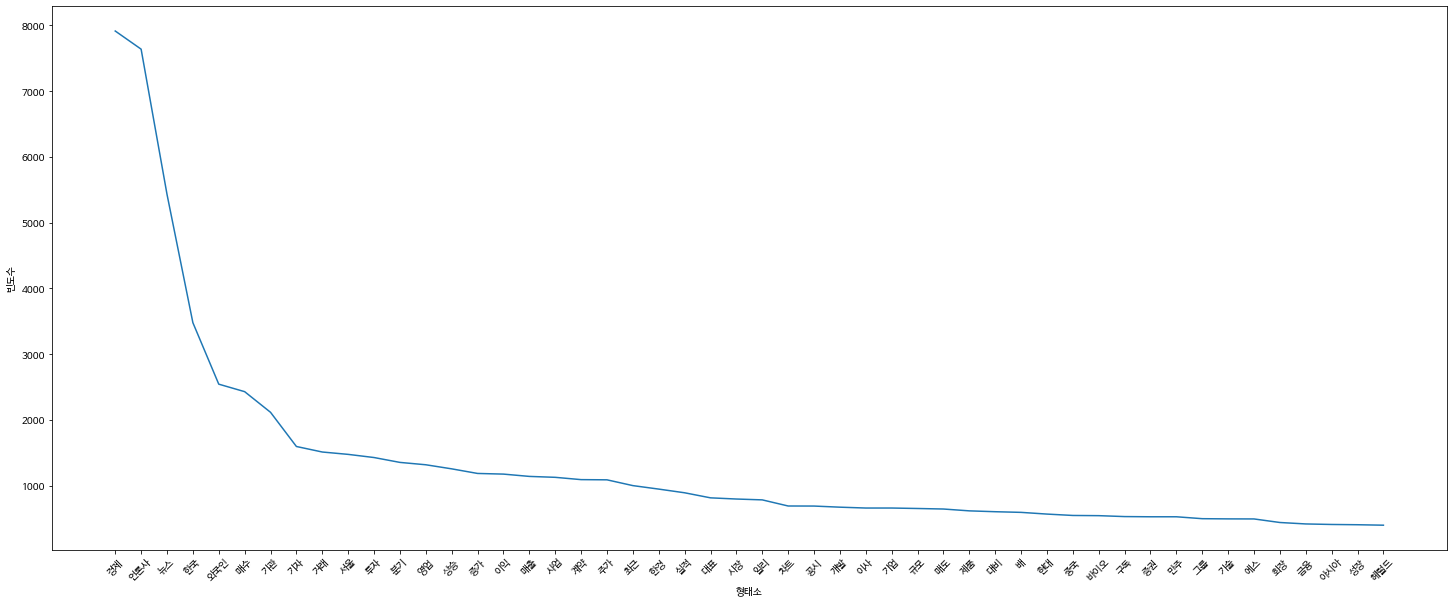

In [46]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 45 )
sns.lineplot(x=issues1904_50.형태소, y=issues1904_50.빈도수)

In [47]:
# 2019년도 4,5월 키워드 빈도수는 차이가 크게 없음 ㅠ

In [48]:
# 다음소프트 키워드별 찾기 얼굴,마스크,피부 , 살인,집,사건,경제,지원,지역

In [49]:
# 키워드별 상위 10개의 주식 종목
def keyword_2019(keywords):
  return issue_2019[issue_2019['이슈내용'].str.contains(keywords)].sort_values('이슈분류이용문서수', ascending=False).drop_duplicates(['주식종목명'], keep='first').head(10)

In [50]:
keyword_2019('지원')

,기준일자,주식종목값,주식종목명,이슈내용,이슈분류이용문서수,우편번호,적재일시,센터코드
28855,2019-04-23,20560,아시아나항공,"[ ['아시아나항공', '지원', '아시아', '있', '여행사', 'GDS', '...",565,7505.0,2.020000e+13,BBP14
37996,2019-04-04,66570,LG전자,"[ ['LG', '전자', '보안', '협력', '전문가', '사', '소프트웨어'...",228,7336.0,2.020000e+13,BBP14
60514,2019-04-24,55550,신한지주,"[ ['금융', '신한', '신한은행', '기업', '이노', '비즈', '혁신',...",225,4513.0,2.020000e+13,BBP14
46108,2019-05-22,17670,SK텔레콤,"[ ['텔레콤', 'SK', 'G', '있', '데이터', 'T', '월', '번호...",221,4539.0,2.020000e+13,BBP14
59181,2019-04-26,270,기아자동차,"[ ['기아차', '지역', '있', '피해', '강원', '경제', '지원', '...",210,6797.0,2.020000e+13,BBP14
39142,2019-04-03,30200,케이티,"[ ['KT', '경제', '서울', '지원금', '화재', '있', '언론사', ...",200,13606.0,2.020000e+13,BBP14
31856,2019-04-16,32640,LG유플러스,"[ ['유', '플러스', 'LG', 'G', '있', '지원금', '제공', '로...",180,4389.0,2.020000e+13,BBP14
60296,2019-04-25,34730,SK,"[ ['사회', '기업', 'SK', '가치', '경제', '있', '지원', '그...",175,3188.0,2.020000e+13,BBP14
39811,2019-04-02,660,SK하이닉스,"[ ['반도체', 'SK', '하이닉스', '클러스터', '조성', '공장', '용...",160,17336.0,2.020000e+13,BBP14
36385,2019-04-08,3490,대한항공,"[ ['대한항공', '트립', '드', '항공사', '바이저', '선정', '지역'...",160,7505.0,2.020000e+13,BBP14


In [51]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [52]:
issue_2019.이슈내용

0        [ ['화학', '선', '차트', '진양', '상승', '주가', '경제', '단...
1        [ ['계약', '경제', '비츠', '규모', '전지', '언론사', '해당', ...
2        [ ['라스', '아트', 'BX', '주주', '밸류', '너스', '파트', '...
3        [ ['경제', '서울', '윈', '팩', '헤럴드', '언론사', '투자', '...
4        [ ['한신공영', '봉사', '기자', '라오스', '가구', '있', '언론사'...
                               ...                        
60607    [ ['SK', '분기', '네트', '웍스', '렌터카', '금융', '영업', ...
60608    [ ['틸', '렉스', '유', '임상', '시험', '중지', '언론사', '처...
60609    [ ['경제', '공시', '언론사', '주가', '한국정보공학', '급등', '관...
60610    [ ['아연', '상승', '가격', '고려', '외국인', 'TC', '만주', ...
60611    [ ['중국', '브랜드', '오리온', '파이', '초코파이', '있', '소비자...
Name: 이슈내용, Length: 33591, dtype: object